In [1]:
import pandas as pd
import CococoNet_reader
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import Name_resolver
import tqdm as tq

In [2]:
def get_ncbi_clean_og2gene_for_species(
    species_1, og2genes_only_cococonet, ncbi_mapping
):

    species_1_name = Name_resolver.species_name_resolver(
        species_1, desired_type="common"
    )

    first_species_ortho_groups = og2genes_only_cococonet.loc[
        og2genes_only_cococonet["Species"] == species_1
    ]
    shared_orthogroups = first_species_ortho_groups["Orthogroup"].unique()

    list_of_orthogene_pds = []
    for orthogroup in tq.tqdm(
        shared_orthogroups, desc="inner_loop", position=0, leave=False
    ):
        species_1_genes = (
            first_species_ortho_groups["Gene"]
            .loc[first_species_ortho_groups["Orthogroup"] == orthogroup]
            .to_list()
        )
        all_gene_combos = species_1_genes
        current_orthogroup_pd = pd.DataFrame(
            columns=[f"{species_1_name} OrthoGene"], data=all_gene_combos
        )
        current_orthogroup_pd["Orthogroup"] = orthogroup
        list_of_orthogene_pds.append(current_orthogroup_pd)

    final_species_lineup = pd.concat(list_of_orthogene_pds)
    ncbi_added_once = final_species_lineup.merge(
        right=ncbi_mapping[["Orthodb Gene", "Symbol"]],
        right_on="Orthodb Gene",
        left_on=f"{species_1_name} OrthoGene",
    )
    ncbi_added_once_clean = ncbi_added_once.drop(columns="Orthodb Gene")
    return ncbi_added_once_clean

In [3]:
og_groups = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/og_2_Genes_with_ncbi_symbol.csv"
)
og_groups

,Orthogroup,Gene,Species,Ortholevel,Orthodb Gene,Symbol
0,100007at3193,4558_0:003a4f,4558,3193,4558_0:003a4f,LOC110434333
1,100007at3193,4577_0:004254,4577,3193,4577_0:004254,LOC100276500
2,100007at3193,4577_0:004e43,4577,3193,4577_0:004e43,LOC100275058
3,100067at3193,4558_0:00439a,4558,3193,4558_0:00439a,LOC8071983
4,100085at3193,4558_0:002fd8,4558,3193,4558_0:002fd8,LOC8086335
...,...,...,...,...,...,...
502887,9969at3193,15368_0:000e9a,15368,3193,15368_0:000e9a,LOC100834561
502888,99917at3193,39947_0:006297,39947,3193,39947_0:006297,LOC107276177
502889,99917at3193,39947_0:00634f,39947,3193,39947_0:00634f,LOC9269479
502890,99917at3193,39947_0:006629,39947,3193,39947_0:006629,LOC9269626


In [4]:
ncbi_mapping = pd.read_csv(
    "/data/passala/OrthoDB_data/NCBI_data/merged_ncbi_to_orthodb_fixed_non_genesymbol.csv"
)

In [7]:
rice_og = get_ncbi_clean_og2gene_for_species(
    39947, og_groups, ncbi_mapping=ncbi_mapping
)

inner_loop:   0%|          | 0/15757 [00:00<?, ?it/s]

In [8]:
sorg_og = get_ncbi_clean_og2gene_for_species(
    4558, og_groups, ncbi_mapping=ncbi_mapping
)

inner_loop:   0%|          | 0/15624 [00:00<?, ?it/s]

In [9]:
high_heat_sorg_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/heat_stress_time_9/sorg_heat_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/heat_stress_time_9/sorg_heat_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/heat_stress_time_9/sorg_heat_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_sorg = pd.DataFrame(
    data=zip(
        high_heat_sorg_rep_1["Reads"],
        high_heat_sorg_rep_2["Reads"],
        high_heat_sorg_rep_3["Reads"],
    ),
    columns=["Tom Hot Rep 1", "Tom Hot Rep 2", "Tom Hot Rep 3"],
    index=high_heat_sorg_rep_1.index,
)

In [10]:
low_heat_sorg_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/control_time_9/sorg_control_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/control_time_9/sorg_control_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg_rep_3 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Sorghum/control_time_9/sorg_control_3ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_sorg = pd.DataFrame(
    data=zip(
        low_heat_sorg_rep_1["Reads"],
        low_heat_sorg_rep_2["Reads"],
        low_heat_sorg_rep_3["Reads"],
    ),
    columns=["Tom Cold Rep 1", "Tom Cold Rep 2", "Tom Cold Rep 3"],
    index=low_heat_sorg_rep_1.index,
)

In [11]:
combined_sorg = pd.concat([high_heat_sorg, low_heat_sorg], axis=1)

In [12]:
dict_version = sorg_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
sorg_csv = combined_sorg.groupby(by = true_dict).mean()

In [14]:
sorg_csv

,Tom Hot Rep 1,Tom Hot Rep 2,Tom Hot Rep 3,Tom Cold Rep 1,Tom Cold Rep 2,Tom Cold Rep 3
100007at3193,0.000000,0.0,0.00,0.00,0.000000,0.00
100067at3193,0.000000,0.0,1.00,0.00,0.000000,0.00
100085at3193,7.000000,0.0,0.00,1.00,0.000000,2.00
100242at3193,0.000000,0.0,0.00,0.00,0.000000,0.00
10051at3193,12.250000,2.0,12.00,10.00,4.500000,1.75
...,...,...,...,...,...,...
9919at3193,124.000000,39.0,76.00,79.00,52.000000,19.00
9942at3193,405.000000,93.0,183.75,320.75,128.500000,107.50
99460at3193,0.000000,0.0,0.00,0.00,0.000000,0.00
99586at3193,0.000000,0.0,0.00,0.00,0.000000,0.00


In [15]:
sorg_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot",'Hot', "Cold", "Cold","Cold"],
    index=[
        "Tom Hot Rep 1",
        "Tom Hot Rep 2",
        "Tom Hot Rep 3",
        "Tom Cold Rep 1",
        "Tom Cold Rep 2",
        "Tom Cold Rep 3"
    ],
)

In [16]:
low_heat_rice_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/control_1hr50min/rice_control_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
low_heat_rice_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/control_1hr50min/rice_control_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


low_heat_rice = pd.DataFrame(
    data=zip(
        low_heat_rice_1["Reads"],
        low_heat_rice_2["Reads"],
    ),
    columns=["Tom Cold Rep 1", "Tom Cold Rep 2"],
    index=low_heat_rice_1.index,
)


In [17]:
high_heat_rice_rep_1 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/heat_1hr50/rice_heat_1ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)
high_heat_rice_rep_2 = pd.read_csv(
    "/data/passala/Module_paper_data/Sorghum_rice_heat_stress/Rice/heat_1hr50/rice_heat_2ReadsPerGene.out.tab",
    sep="\t",
    index_col=0,
    skiprows=4,
    header=None,
    names=["Reads", "Left Reads", "Right reads"],
)


high_heat_rice = pd.DataFrame(
    data=zip(
        high_heat_rice_rep_1["Reads"],
        high_heat_rice_rep_2["Reads"],
    ),
    columns=["Tom Hot Rep 1", "Tom Hot Rep 2"],
    index=low_heat_rice_1.index,
)

In [18]:
combined_rice = pd.concat([high_heat_rice, low_heat_rice], axis=1)

In [19]:
dict_version = rice_og[['Orthogroup','Symbol']].set_index('Symbol').to_dict()
true_dict = dict_version['Orthogroup']
combined_rice = combined_rice.groupby(by = true_dict).mean()

In [20]:
combined_rice

,Tom Hot Rep 1,Tom Hot Rep 2,Tom Cold Rep 1,Tom Cold Rep 2
100263at3193,0.000000,0.000000,0.000000,0.00
1004at3193,22.000000,34.000000,33.000000,63.00
10051at3193,0.000000,0.000000,0.000000,0.00
10055at3193,365.000000,388.000000,48.000000,81.00
10092at3193,1192.000000,1418.000000,1554.000000,1679.00
...,...,...,...,...
9919at3193,460.000000,674.000000,792.000000,894.00
99342at3193,5.000000,5.000000,0.000000,3.00
9942at3193,1651.750000,1982.250000,1651.000000,1949.75
9959at3193,1632.000000,1727.000000,2110.000000,2375.00


In [21]:
combined_rice = combined_rice.T
sorg_csv = sorg_csv.T

In [22]:
combined_rice = combined_rice.round(0)
sorg_csv = sorg_csv.round(0)

In [26]:
rice_metadata = pd.DataFrame(
    columns=["Temp"],
    data=["Hot", "Hot", "Cold", "Cold"],
    index=[
        "Tom Hot Rep 1",
        "Tom Hot Rep 2",
        "Tom Cold Rep 1",
        "Tom Cold Rep 2",
    ],
)

In [24]:
genes_to_keep_sorg = sorg_csv.columns[sorg_csv.sum(axis=0) >= 100]
sorg_csv = sorg_csv[genes_to_keep_sorg]
inference_sorg = DefaultInference(n_cpus=30)
dds_sorg = DeseqDataSet(
    counts=sorg_csv,
    metadata=sorg_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference_sorg,
)
dds_sorg.deseq2()
stat_res_sorg = DeseqStats(dds_sorg, inference=inference_sorg)
stat_res_sorg.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.70 seconds.

Fitting dispersion trend curve...
... done in 0.42 seconds.

Fitting MAP dispersions...
... done in 0.71 seconds.

Fitting LFCs...
... done in 0.64 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
10091at3193   24.529169       -0.519809  0.427469 -1.216017  0.223979   
10092at3193   69.142931       -0.319444  0.338715 -0.943105  0.345627   
10147at3193  108.997610        0.047785  0.301070  0.158717  0.873892   
10186at3193   16.236855       -0.242881  0.977800 -0.248396  0.803828   
10216at3193  798.713911       -0.260172  0.601723 -0.432378  0.665467   
...                 ...             ...       ...       ...       ...   
9877at3193   499.702953       -0.004165  0.270531 -0.015395  0.987717   
9917at3193    48.416264       -0.020044  0.396976 -0.050491  0.959731   
9919at3193    57.515908        0.393041  0.406946  0.965831  0.334129   
9942at3193   178.571035       -0.050222  0.292105 -0.171933  0.863490   
9959at3193   207.644764       -0.200926  0.412389 -0.487225  0.626099   

                 padj  
10091at3193  0.762627  
10092at3193  0.84978

... done in 0.45 seconds.



In [27]:
genes_to_keep = combined_rice.columns[combined_rice.sum(axis=0) >= 100]
combined_rice = combined_rice[genes_to_keep]
inference = DefaultInference(n_cpus=30)
dds = DeseqDataSet(
    counts=combined_rice,
    metadata=rice_metadata,
    design_factors="Temp",
    refit_cooks=True,
    inference=inference,
)
dds.deseq2()
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.54 seconds.

Fitting dispersion trend curve...
... done in 0.25 seconds.

/home/passala/miniconda3/envs/Py_deseq/lib/python3.12/site-packages/pydeseq2/dds.py:425: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 0.78 seconds.

Fitting LFCs...
... done in 0.50 seconds.

Refitting 0 outliers.

Running Wald tests...


Log2 fold change & Wald test p-value: Temp Hot vs Cold
                baseMean  log2FoldChange     lfcSE       stat        pvalue  \
1004at3193     36.931248       -0.680521  0.530139  -1.283665  1.992591e-01   
10055at3193   225.241606        2.655652  0.258142  10.287573  8.017192e-25   
10092at3193  1451.308111       -0.220261  0.120092  -1.834098  6.663942e-02   
10147at3193   156.570198       -0.045041  0.270481  -0.166521  8.677473e-01   
10228at3193  2513.973891        0.008648  0.107446   0.080483  9.358532e-01   
...                  ...             ...       ...        ...           ...   
98658at3193   432.744715       -3.139438  1.031993  -3.042110  2.349258e-03   
9877at3193   4699.990916        0.519326  0.097891   5.305165  1.125712e-07   
9919at3193    694.739329       -0.494977  0.152735  -3.240765  1.192096e-03   
9942at3193   1800.081493        0.105290  0.113129   0.930710  3.520037e-01   
9959at3193   1949.893030       -0.318428  0.121012  -2.631379  8.503910e-03 

... done in 0.47 seconds.



In [29]:
full_results_rice = stat_res.results_df
full_results_rice
full_sorg_results = stat_res_sorg.results_df

In [30]:
full_results_rice.to_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/rice_ortho_de_results.csv')
full_sorg_results.to_csv('/data/passala/Module_paper_data/Sorghum_rice_heat_stress/sorg_ortho_de_results.csv')


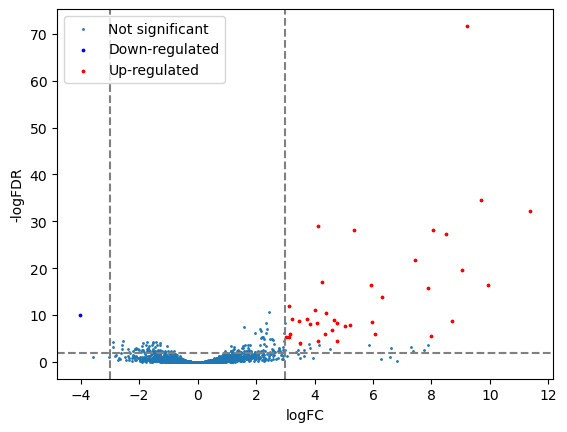

In [31]:
plt.scatter(
    x=full_sorg_results["log2FoldChange"],
    y=full_sorg_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down_sorg = full_sorg_results[
    (full_sorg_results["log2FoldChange"] <= -3)
    & (full_sorg_results["padj"] <= 0.0001)
]
up_sorg = full_sorg_results[
    (full_sorg_results["log2FoldChange"] >= 3) & (full_sorg_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down_sorg["log2FoldChange"],
    y=down_sorg["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up_sorg["log2FoldChange"],
    y=up_sorg["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [47]:
up_sorg

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Locus,,,,,,
110893at3193,77.094774,4.162603,0.462889,8.992665,2.413069e-19,2.048696e-17
114038at3193,1593.705104,6.541322,0.484945,13.488783,1.820817e-41,1.182138e-38
114515at3193,1533.063783,5.641658,0.328830,17.156747,5.596189e-66,1.544128e-62
115912at3193,32.660289,4.729022,0.760655,6.217041,5.066174e-10,1.225596e-08
128908at3193,51.081909,3.680227,0.825952,4.455741,8.360376e-06,7.333176e-05
...,...,...,...,...,...,...
888273at3193,4445.634296,3.435822,0.203916,16.849188,1.063646e-63,2.347892e-60
888594at3193,63.921027,3.167503,0.504336,6.280538,3.374044e-10,8.497664e-09
889750at3193,105.818794,3.370914,0.427093,7.892693,2.957341e-15,1.640209e-13


/tmp/ipykernel_648866/2187282460.py:3: RuntimeWarning: divide by zero encountered in log10
  y=full_results["padj"].apply(lambda x: -np.log10(x)),
/tmp/ipykernel_648866/2187282460.py:18: RuntimeWarning: divide by zero encountered in log10
  y=down["padj"].apply(lambda x: -np.log10(x)),
/tmp/ipykernel_648866/2187282460.py:25: RuntimeWarning: divide by zero encountered in log10
  y=up["padj"].apply(lambda x: -np.log10(x)),


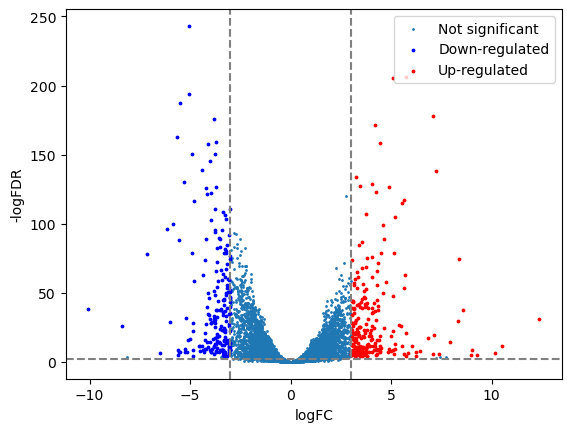

In [49]:
plt.scatter(
    x=full_results["log2FoldChange"],
    y=full_results["padj"].apply(lambda x: -np.log10(x)),
    s=1,
    label="Not significant",
)

# highlight down- or up- regulated genes
down = full_results[
    (full_results["log2FoldChange"] <= -3) & (full_results["padj"] <= 0.0001)
]
up = full_results[
    (full_results["log2FoldChange"] >= 3) & (full_results["padj"] <= 0.0001)
]

plt.scatter(
    x=down["log2FoldChange"],
    y=down["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Down-regulated",
    color="blue",
)
plt.scatter(
    x=up["log2FoldChange"],
    y=up["padj"].apply(lambda x: -np.log10(x)),
    s=3,
    label="Up-regulated",
    color="red",
)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-3, color="grey", linestyle="--")
plt.axvline(3, color="grey", linestyle="--")
plt.axhline(2, color="grey", linestyle="--")
plt.legend()

In [50]:
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
10238at3193,18.554908,3.286850,0.700979,4.688945,2.746174e-06,7.748211e-06
10488at3193,52.714341,3.370811,0.479025,7.036822,1.966743e-12,1.061378e-11
110152at3193,24.742722,3.032530,0.558824,5.426629,5.742827e-08,1.987988e-07
11017at3193,51.827406,3.575398,0.513246,6.966247,3.255071e-12,1.718912e-11
110343at3193,304.120376,3.624832,0.235374,15.400305,1.628999e-53,9.112053e-52
...,...,...,...,...,...,...
889990at3193,147.367398,3.036290,0.266579,11.389854,4.697765e-30,8.209053e-29
895391at3193,123.323999,5.483741,0.498957,10.990408,4.250022e-28,6.617265e-27
933206at3193,83.063120,4.448669,0.483240,9.205922,3.387493e-20,3.388134e-19
938758at3193,310.969430,4.291252,0.858164,5.000503,5.718093e-07,1.757316e-06
